<a href="https://colab.research.google.com/github/fikrihakim89/shopee-reviews-dashboard/blob/main/Final%20Shopee%20Group%204%20Predictive%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 5.0 MB/s eta 0:00:00


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Shopee_translated.csv to Shopee_translated.csv


In [3]:
df_full = pd.read_csv('Shopee_translated.csv', delimiter=';', on_bad_lines='skip')
df = df_full.head(1000)
print(df.shape)

abstracts = df_full.sample(n=df.shape[0], random_state=42).content_en.to_list()
print(abstracts[35])

(998, 5)
buying all kinds of necessities becomes very easy


In [10]:
from bertopic import BERTopic

topic_model = BERTopic()
topic, probs = topic_model.fit_transform(abstracts)

In [5]:
abstracts = df['content_en'].to_list()
print(abstracts[:10])

['Economical shopping, satisfied, anti-ribbed. The seller is trustworthy, the courier is fast', 'Good', '🤩', 'Good', "I like the gratong feature and the response of the Shopee admin and the shop, but it's friendly and responsive, thank you Shopee", 'gooooodddd', 'Shopee is extraordinary, smooth and increasingly popular... always success for Shopee', "very helpful for me who doesn't like complicated things", "unfortunately my s paylater can't be activated", 'thank you shopee']


In [11]:
topic_info = topic_model.get_topic_info()
topic_info

,Topic,Count,Name,Representation,Representative_Docs
0,-1,189,-1_the_to_and_is,"[the, to, and, is, are, it, of, its, my, in]","[why is the courier number not there, this imp..."
1,0,135,0_shopee_shopping_best_is,"[shopee, shopping, best, is, at, you, thank, a...","[Shopee is the best...👍👍, Shopee is the best, ..."
2,1,67,1_good_goodthe_goodlah_driver,"[good, goodthe, goodlah, driver, yes, okay, th...","[Good, good, Good]"
3,2,48,2_it_to_the_cant,"[it, to, the, cant, you, was, but, be, if, this]",[I want to ask: My previous cellphone was comp...
4,3,44,3_helpful_very_useful_help,"[helpful, very, useful, help, beneficial, reco...","[very helpful, very helpful 😁🙏, very helpful]"
5,4,43,4_ok_fine_okay_thats,"[ok, fine, okay, thats, everything, if, im, an...","[ok, ok, ok]"
6,5,43,5_solid_damage_temperature_fit,"[solid, damage, temperature, fit, strong, stea...","[solid, solid, solid]"
7,6,43,6_delivery_the_was_package,"[delivery, the, was, package, didnt, days, lon...",[I've always shopped at Shopee for a long time...
8,7,36,7_fast_delivery_courier_goods,"[fast, delivery, courier, goods, arrived, on, ...",[the courier is friendly.the goods arrived on ...
9,8,35,8_xl_keren_100k_50k,"[xl, keren, 100k, 50k, kk, 100, 110k, 105k, 13...","[keren, Keren, mi uPO WORKSHIT ANGSAKU 150 WAJ..."


In [12]:
topic_model.visualize_barchart(width=280, height=330, top_n_topics=20, n_words=10)

In [14]:
topic_model.visualize_heatmap()

In [15]:
# Visualize documents using the reduced embeddings
topic_model.visualize_documents(
    abstracts,
    topics=list(range(30)),
    custom_labels=True,
    height=600
)

In [16]:
topic_model.update_topics(abstracts)
topic_info_reduced = topic_model.get_topic_info()
display(topic_info_reduced)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,189,-1_the_to_and_is,"[the, to, and, is, are, it, of, its, my, in]","[why is the courier number not there, this imp..."
1,0,135,0_shopee_shopping_best_is,"[shopee, shopping, best, is, at, you, thank, a...","[Shopee is the best...👍👍, Shopee is the best, ..."
2,1,67,1_good_goodthe_goodlah_driver,"[good, goodthe, goodlah, driver, yes, okay, th...","[Good, good, Good]"
3,2,48,2_it_to_the_cant,"[it, to, the, cant, you, was, but, be, if, this]",[I want to ask: My previous cellphone was comp...
4,3,44,3_helpful_very_useful_help,"[helpful, very, useful, help, beneficial, reco...","[very helpful, very helpful 😁🙏, very helpful]"
5,4,43,4_ok_fine_okay_thats,"[ok, fine, okay, thats, everything, if, im, an...","[ok, ok, ok]"
6,5,43,5_solid_damage_temperature_fit,"[solid, damage, temperature, fit, strong, stea...","[solid, solid, solid]"
7,6,43,6_delivery_the_was_package,"[delivery, the, was, package, didnt, days, lon...",[I've always shopped at Shopee for a long time...
8,7,36,7_fast_delivery_courier_goods,"[fast, delivery, courier, goods, arrived, on, ...",[the courier is friendly.the goods arrived on ...
9,8,35,8_xl_keren_100k_50k,"[xl, keren, 100k, 50k, kk, 100, 110k, 105k, 13...","[keren, Keren, mi uPO WORKSHIT ANGSAKU 150 WAJ..."


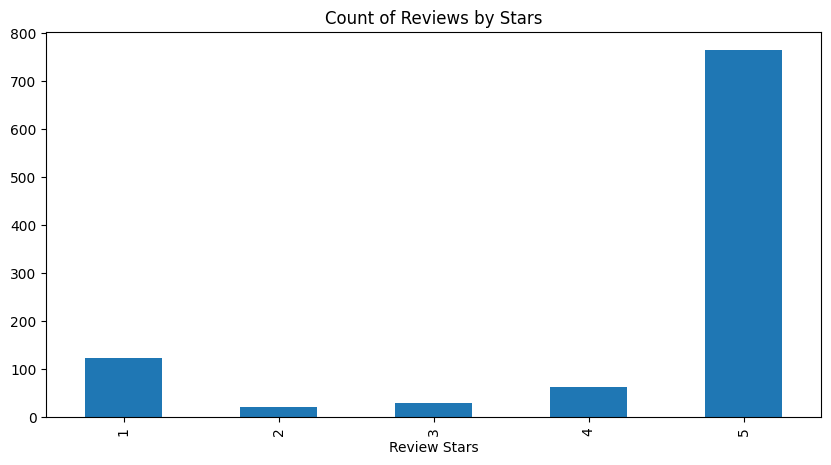

In [17]:
import matplotlib.pyplot as plt

ax = df['score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [21]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')
nltk.download('vader_lexicon')
nltk.download('punkt_tab')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [19]:
example = df['content_en'][0]
print(example)

Economical shopping, satisfied, anti-ribbed. The seller is trustworthy, the courier is fast


In [22]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Economical',
 'shopping',
 ',',
 'satisfied',
 ',',
 'anti-ribbed',
 '.',
 'The',
 'seller',
 'is']

In [23]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Economical', 'JJ'),
 ('shopping', 'NN'),
 (',', ','),
 ('satisfied', 'VBD'),
 (',', ','),
 ('anti-ribbed', 'JJ'),
 ('.', '.'),
 ('The', 'DT'),
 ('seller', 'NN'),
 ('is', 'VBZ')]

In [24]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (GPE Economical/JJ)
  shopping/NN
  ,/,
  satisfied/VBD
  ,/,
  anti-ribbed/JJ
  ./.
  The/DT
  seller/NN
  is/VBZ
  trustworthy/JJ
  ,/,
  the/DT
  courier/NN
  is/VBZ
  fast/JJ)


In [25]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [26]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.7506}

In [27]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['content_en']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/998 [00:00<?, ?it/s]

In [28]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

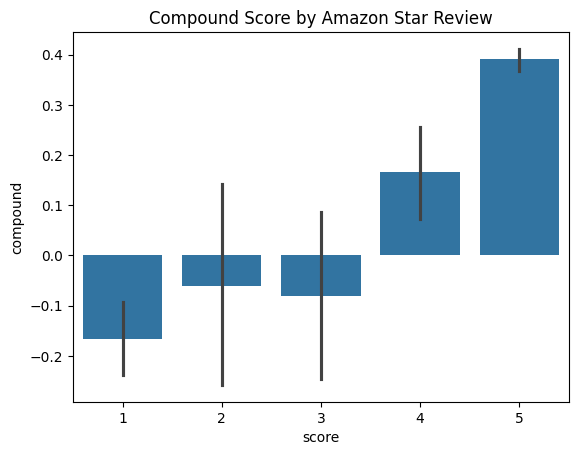

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(data=vaders, x='score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

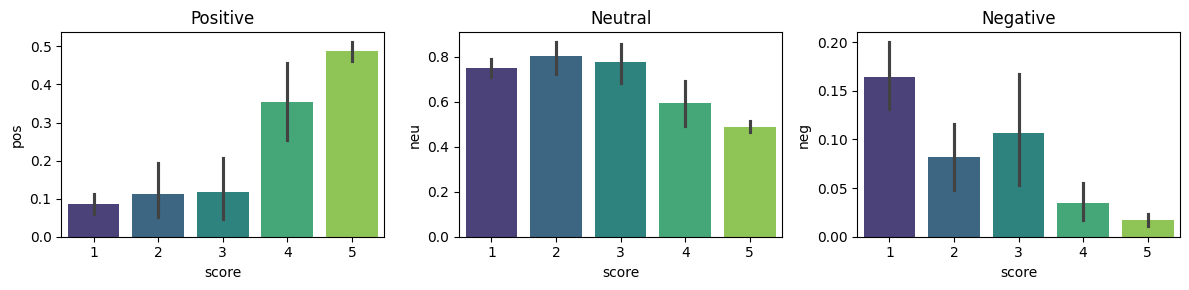

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='score', y='pos', ax=axs[0], palette='viridis')
sns.barplot(data=vaders, x='score', y='neu', ax=axs[1], palette='viridis')
sns.barplot(data=vaders, x='score', y='neg', ax=axs[2], palette='viridis')
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [31]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [32]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [33]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': np.float32(0.014333718), 'roberta_neu': np.float32(0.31145957), 'roberta_pos': np.float32(0.67420673)}


In [35]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [36]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['content_en']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/998 [00:00<?, ?it/s]

In [37]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,score,at,content,content_en
0,1,0.0,0.610,0.390,0.7506,0.014334,0.311460,0.674207,5,15/09/2025 14:19,"belanja hemat,puas anti ribed.penjualnya amana...","Economical shopping, satisfied, anti-ribbed. T..."
1,2,0.0,0.000,1.000,0.4404,0.060793,0.329428,0.609779,5,15/09/2025 14:19,Bagus,Good
2,3,0.0,0.000,0.000,0.0000,0.006638,0.082659,0.910703,5,15/09/2025 14:19,🤩,🤩
3,4,0.0,0.000,1.000,0.4404,0.060793,0.329428,0.609779,5,15/09/2025 14:18,bagus,Good
4,5,0.0,0.589,0.411,0.9109,0.001496,0.014942,0.983563,5,15/09/2025 14:18,suka sama fitur gratongnya dan respon admin Sh...,I like the gratong feature and the response of...


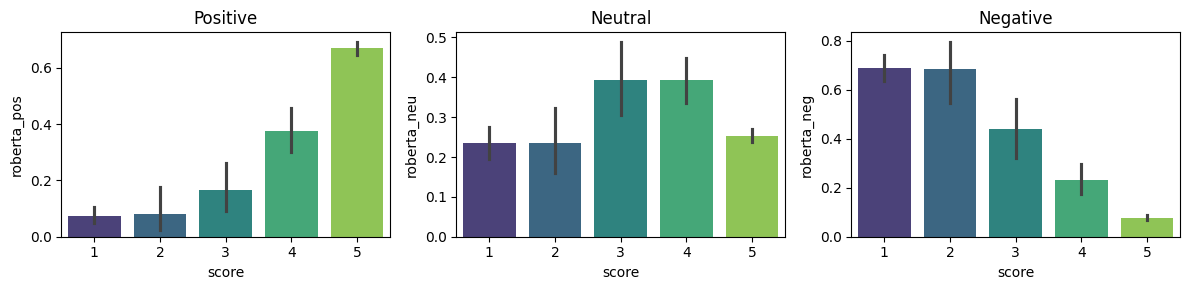

In [38]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=results_df, x='score', y='roberta_pos', ax=axs[0], palette='viridis')
sns.barplot(data=results_df, x='score', y='roberta_neu', ax=axs[1], palette='viridis')
sns.barplot(data=results_df, x='score', y='roberta_neg', ax=axs[2], palette='viridis')
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [39]:
# Add topic information to the results_df
# The topic variable is a list where the index corresponds to the order of reviews in the original list used for fitting
# Assuming the order of reviews in 'abstracts' (used for BERTopic) is the same as in results_df['content_en']
results_df['topic'] = topic

# Aggregate sentiment by topic, excluding Vader scores
topic_sentiment = results_df.groupby('topic').agg(
    count=('Id', 'count'), # Use count of 'Id' as count
    avg_roberta_neg=('roberta_neg', 'mean'),
    avg_roberta_neu=('roberta_neu', 'mean'),
    avg_roberta_pos=('roberta_pos', 'mean')
).reset_index()

# Calculate priority score based on count and average roberta_neg
topic_sentiment['priority_score'] = topic_sentiment['count'] * topic_sentiment['avg_roberta_neg']

# Display top topics by priority score
display(topic_sentiment.sort_values('priority_score', ascending=False).head(10))

,topic,count,avg_roberta_neg,avg_roberta_neu,avg_roberta_pos,priority_score
0,-1,189,0.268347,0.297727,0.433926,50.717664
3,2,48,0.655685,0.240196,0.104119,31.472865
7,6,43,0.691827,0.240923,0.067250,29.748571
5,4,43,0.225847,0.467893,0.306260,9.711400
21,20,17,0.569178,0.352392,0.078430,9.676029
17,16,23,0.341929,0.121728,0.536343,7.864367
6,5,43,0.178919,0.498408,0.322673,7.693531
1,0,135,0.048835,0.120234,0.830931,6.592748
9,8,35,0.165170,0.618754,0.216076,5.780966
2,1,67,0.062879,0.315872,0.621249,4.212863


In [52]:
!streamlit run app.py &>/dev/null&
!npx localtunnel --port 8501

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼your url is: https://neat-boats-cheer.loca.lt
^C


In [53]:
%%writefile requirements.txt
streamlit
pandas
plotly
matplotlib
wordcloud
bertopic
sentence-transformers
hdbscan
umap-learn

Writing requirements.txt


In [56]:
%%writefile app.py
import streamlit as st
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# from bertopic.topic_info import Name # This import is not needed if we get Name from topic_model.get_topic_info()

# --- NLTK Downloads ---
import nltk
import os

# Define a directory to download NLTK data in the app's root directory
nltk_data_path = os.path.join(".", "nltk_data")
os.makedirs(nltk_data_path, exist_ok=True)
nltk.data.path.append(nltk_data_path)

# Download necessary NLTK data if not already present
try:
    nltk.data.find('sentiment/vader_lexicon.zip', paths=[nltk_data_path])
except LookupError:
    try:
        nltk.download('vader_lexicon', download_dir=nltk_data_path)
    except Exception as e:
        st.error(f"Failed to download NLTK vader_lexicon: {e}")

try:
    nltk.data.find('tokenizers/punkt.zip', paths=[nltk_data_path])
except LookupError:
     try:
         nltk.download('punkt', download_dir=nltk_data_path)
     except Exception as e:
         st.error(f"Failed to download NLTK punkt: {e}")


# --- Load Data ---
st.set_page_config(page_title="Shopee Descriptive Analysis Dashboard", layout="wide")
st.title("🛒 Shopee Review Descriptive Analysis Dashboard")

# Load data directly from the CSV file
df_full = pd.read_csv('Shopee_translated.csv', delimiter=';', on_bad_lines='skip')
df = df_full.head(1000).copy() # Using head(1000) and .copy() to match the notebook's data

# --- Perform Sentiment Analysis (replicated from notebook for self-containment) ---
from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax


# Load RoBERTa model and tokenizer (cached)
@st.cache_resource
def load_roberta_model():
    MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
    tokenizer = AutoTokenizer.from_pretrained(MODEL)
    model = AutoModelForSequenceClassification.from_pretrained(MODEL)
    return tokenizer, model

tokenizer, model = load_roberta_model()

def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

# Calculate sentiment scores and merge with dataframe
sia = SentimentIntensityAnalyzer()
res = {}
for i, row in df.iterrows(): # Iterate through df to match the notebook's analysis on head(1000)
    try:
        text = str(row['content_en']) # Ensure text is string
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        # Handle potential RuntimeError from tokenizer/model if needed, or log
        pass # Ignoring for simplicity in app

sentiment_df = pd.DataFrame(res).T.reset_index().rename(columns={'index': 'Id'})
df = df.merge(sentiment_df, how='left')


# --- Perform Topic Modeling (replicated from notebook for self-containment) ---
from bertopic import BERTopic

# Ensure NLTK punkt tokenizer is available for BERTopic if needed (though BERTopic often uses SentenceTransformers directly)
# Try downloading punkt, but pass if already exists or fails
# This check and download is now handled in the NLTK Downloads section at the top


# BERTopic needs a list of documents; use 'content_en' from the potentially filtered df
abstracts = df['content_en'].to_list()

@st.cache_resource # Cache the BERTopic model
def fit_bertopic_model(docs):
    # Use a pre-trained sentence transformer model
    from sentence_transformers import SentenceTransformer
    # Explicitly set a common model that is likely compatible
    sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
    embeddings = sentence_model.encode(docs, show_progress_bar=False)

    topic_model = BERTopic() # You can pass min_topic_size here if needed
    topics, probs = topic_model.fit_transform(docs, embeddings) # Fit with precomputed embeddings
    return topic_model, topics

# Fit the model to the abstracts from the loaded data
topic_model, topic = fit_bertopic_model(abstracts)

# Add topic information to the DataFrame
df['topic'] = topic

# Get topic names from the fitted model
topic_info_df = topic_model.get_topic_info()
# Create a mapping from topic id to topic name
topic_name_map = topic_info_df.set_index('Topic')['Name'].to_dict()
# Map the topic ids in df to topic names
df['topic_name'] = df['topic'].map(topic_name_map)


# Ensure sentiment_label and review_en columns exist for plotting/wordcloud
if 'sentiment_label' not in df.columns:
    def get_sentiment_label(row):
        # Use Roberta scores for sentiment label
        if row['roberta_pos'] > row['roberta_neg'] and row['roberta_pos'] > row['roberta_neu']:
            return 'positive'
        elif row['roberta_neg'] > row['roberta_pos'] and row['roberta_neg'] > row['roberta_neu']:
            return 'negative'
        else:
            return 'neutral'
    df['sentiment_label'] = df.apply(get_sentiment_label, axis=1)

if 'review_en' not in df.columns:
    df['review_en'] = df['content_en']

# The rest of the Streamlit app code remains the same, operating on the 'df' DataFrame

# --- Sidebar Filters ---
# Ensure -1 (outlier topic) is an option
all_topics = ['-1_the_to_and_is'] + sorted([name for name in df['topic_name'].unique() if name != '-1_the_to_and_is'])
topics = st.sidebar.multiselect("Select Topics", all_topics, default=all_topics)

if topics:
    df_filtered = df[df['topic_name'].isin(topics)]
else:
    df_filtered = df # Use all data if no topics are selected

# --- Sentiment Distribution ---
st.subheader("Sentiment Distribution")
if not df_filtered.empty:
    sent_count = df_filtered['sentiment_label'].value_counts().reset_index()
    sent_count.columns = ['Sentiment', 'Count']
    fig1 = px.pie(sent_count, values='Count', names='Sentiment', color='Sentiment',
                  color_discrete_map={'positive':'green','neutral':'gray','negative':'red'})
    st.plotly_chart(fig1, use_container_width=True)
else:
    st.write("No data available for selected topics.")


# --- Topic Frequency ---
st.subheader("Top Topics by Frequency")
if not df_filtered.empty:
    # Group by topic_name to get counts of selected topics
    topic_freq = df_filtered.groupby('topic_name').size().reset_index(name='Count').sort_values('Count', ascending=False)
    # Include topics that were selected but have 0 count in the filtered data
    selected_topics_with_zero_count = pd.DataFrame({'topic_name': topics, 'Count': 0})
    topic_freq = pd.concat([topic_freq, selected_topics_with_zero_count]).drop_duplicates(subset=['topic_name']).sort_values('Count', ascending=False)
    # Filter out the -1 topic from this visualization unless specifically selected and has count > 0
    if '-1_the_to_and_is' in topic_freq['topic_name'].values and '-1_the_to_and_is' not in topics and topic_freq[topic_freq['topic_name'] == '-1_the_to_and_is']['Count'].iloc[0] > 0:
         # If -1 is in the data but not explicitly selected, and has reviews, keep it
         pass # Keep it for now, filtering happens in the `if topics:` block
    elif '-1_the_to_and_is' in topic_freq['topic_name'].values and '-1_the_to_and_is' in topics and topic_freq[topic_freq['topic_name'] == '-1_the_to_and_is']['Count'].iloc[0] == 0:
        # If -1 was selected but has 0 reviews in filtered data, remove it
        topic_freq = topic_freq[topic_freq['topic_name'] != '-1_the_to_and_is']
    elif '-1_the_to_and_is' in topic_freq['topic_name'].values and '-1_the_to_and_is' not in topics:
         # If -1 is in the data but not explicitly selected, remove it for this chart
        topic_freq = topic_freq[topic_freq['topic_name'] != '-1_the_to_and_is']


    fig2 = px.bar(topic_freq, x='Count', y='topic_name', orientation='h', color='Count',
                  color_continuous_scale='Blues', title="Frequency of Selected Topics (Excluding Outliers by Default)")
    st.plotly_chart(fig2, use_container_width=True)
else:
     st.write("No data available for selected topics.")

# --- Average Sentiment by Topic ---
st.subheader("Average Negative Sentiment per Topic")
if not df_filtered.empty:
    # Group by topic_name for selected topics only
    topic_sent = df_filtered.groupby('topic_name')['roberta_neg'].mean().reset_index().sort_values('roberta_neg', ascending=False)

    fig3 = px.bar(topic_sent, x='roberta_neg', y='topic_name', orientation='h', color='roberta_neg',
                  color_continuous_scale='Reds', labels={'roberta_neg': 'Avg Negativity'},
                  title="Average Roberta Negative Sentiment for Selected Topics")
    st.plotly_chart(fig3, use_container_width=True)
else:
     st.write("No data available for selected topics.")

# --- Word Cloud (Keywords Visualization) ---
st.subheader("Word Cloud of All Reviews in Selected Topics")
if not df_filtered.empty:
    text = " ".join(review for review in df_filtered.review_en.astype(str))
    if text.strip(): # Check if there is any text to generate wordcloud
        wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)
        fig, ax = plt.subplots()
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis("off")
        st.pyplot(fig)
    else:
        st.write("No text available for Word Cloud in selected topics.")
else:
     st.write("No data available for selected topics.")

Overwriting app.py


In [50]:
from pyngrok import ngrok
import subprocess
import time

# Kill any running ngrok tunnels
ngrok.kill()

# Start ngrok tunnel
public_url = ngrok.connect(8501)
print(f"🌍 Streamlit app will be available at: {public_url}")

# Run the Streamlit app
# Use subprocess.Popen to keep the process running
process = subprocess.Popen(["streamlit", "run", "app.py", "--server.port", "8501", "--server.address", "0.0.0.0", "--browser.gatherUsageStats", "false"])

try:
    # Keep the cell alive while the Streamlit app is running
    while True:
        time.sleep(1)
except KeyboardInterrupt:
    print("Streamlit app stopped.")
    process.kill()

ERROR:pyngrok.process.ngrok:t=2025-10-28T18:08:13+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-10-28T18:08:13+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-10-28T18:08:13+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.

In [45]:
!pip install streamlit pyngrok pandas plotly matplotlib wordcloud

In [42]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 55.4 MB/s eta 0:00:00


2025-10-28 17:58:46.442 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 17:58:46.445 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 17:58:47.077 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-10-28 17:58:47.081 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 17:58:47.082 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 17:58:47.152 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 17:58:47.155 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

DeltaGenerator()

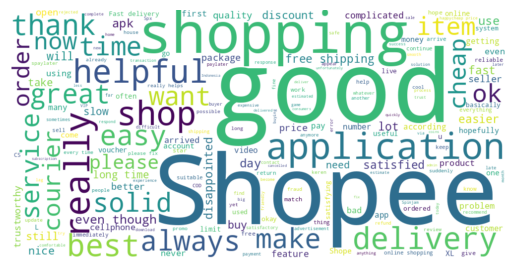

In [44]:
import streamlit as st
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# --- Load Data ---
st.set_page_config(page_title="Shopee Descriptive Analysis Dashboard", layout="wide")
st.title("🛒 Shopee Review Descriptive Analysis Dashboard")

# Use the existing results_df DataFrame
# Ensure necessary columns exist or are created
if 'topic_name' not in results_df.columns:
    # Get topic names from topic_model.get_topic_info()
    topic_info_df = topic_model.get_topic_info()
    # Create a mapping from topic id to topic name
    topic_name_map = topic_info_df.set_index('Topic')['Name'].to_dict()
    # Map the topic ids in results_df to topic names
    results_df['topic_name'] = results_df['topic'].map(topic_name_map)


if 'sentiment_label' not in results_df.columns:
    def get_sentiment_label(row):
        if row['roberta_pos'] > row['roberta_neg'] and row['roberta_pos'] > row['roberta_neu']:
            return 'positive'
        elif row['roberta_neg'] > row['roberta_pos'] and row['roberta_neg'] > row['roberta_neu']:
            return 'negative'
        else:
            return 'neutral'
    results_df['sentiment_label'] = results_df.apply(get_sentiment_label, axis=1)

if 'review_en' not in results_df.columns:
    results_df['review_en'] = results_df['content_en']

df_app = results_df.copy()

# --- Sidebar Filters ---
topics = st.sidebar.multiselect("Select Topics", df_app['topic_name'].unique())
if topics:
    df_app = df_app[df_app['topic_name'].isin(topics)]

# --- Sentiment Distribution ---
st.subheader("Sentiment Distribution")
sent_count = df_app['sentiment_label'].value_counts().reset_index()
sent_count.columns = ['Sentiment', 'Count']
fig1 = px.pie(sent_count, values='Count', names='Sentiment', color='Sentiment',
              color_discrete_map={'positive':'green','neutral':'gray','negative':'red'})
st.plotly_chart(fig1, use_container_width=True)

# --- Topic Frequency ---
st.subheader("Top Topics by Frequency")
topic_freq = df_app.groupby('topic_name').size().reset_index(name='Count').sort_values('Count', ascending=False)
fig2 = px.bar(topic_freq, x='Count', y='topic_name', orientation='h', color='Count',
              color_continuous_scale='Blues')
st.plotly_chart(fig2, use_container_width=True)

# --- Average Sentiment by Topic ---
st.subheader("Average Negative Sentiment per Topic")
topic_sent = df_app.groupby('topic_name')['roberta_neg'].mean().reset_index().sort_values('roberta_neg', ascending=False)
fig3 = px.bar(topic_sent, x='roberta_neg', y='topic_name', orientation='h', color='roberta_neg',
              color_continuous_scale='Reds', labels={'roberta_neg': 'Avg Negativity'})
st.plotly_chart(fig3, use_container_width=True)

# --- Word Cloud (Keywords Visualization) ---
st.subheader("Word Cloud of All Reviews")
text = " ".join(review for review in df_app.review_en.astype(str))
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
st.pyplot(plt)

In [41]:
import streamlit as st
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# --- Load Data ---
st.set_page_config(page_title="Shopee Descriptive Analysis Dashboard", layout="wide")
st.title("🛒 Shopee Review Descriptive Analysis Dashboard")

# Use the existing results_df DataFrame
# Ensure necessary columns exist or are created
if 'topic_name' not in results_df.columns:
    results_df['topic_name'] = results_df['topic'].astype(str) + '_' + results_df['Name']

if 'sentiment_label' not in results_df.columns:
    def get_sentiment_label(row):
        if row['roberta_pos'] > row['roberta_neg'] and row['roberta_pos'] > row['roberta_neu']:
            return 'positive'
        elif row['roberta_neg'] > row['roberta_pos'] and row['roberta_neg'] > row['roberta_neu']:
            return 'negative'
        else:
            return 'neutral'
    results_df['sentiment_label'] = results_df.apply(get_sentiment_label, axis=1)

if 'review_en' not in results_df.columns:
    results_df['review_en'] = results_df['content_en']

df_app = results_df.copy()

# --- Sidebar Filters ---
topics = st.sidebar.multiselect("Select Topics", df_app['topic_name'].unique())
if topics:
    df_app = df_app[df_app['topic_name'].isin(topics)]

# --- Sentiment Distribution ---
st.subheader("Sentiment Distribution")
sent_count = df_app['sentiment_label'].value_counts().reset_index()
sent_count.columns = ['Sentiment', 'Count']
fig1 = px.pie(sent_count, values='Count', names='Sentiment', color='Sentiment',
              color_discrete_map={'positive':'green','neutral':'gray','negative':'red'})
st.plotly_chart(fig1, use_container_width=True)

# --- Topic Frequency ---
st.subheader("Top Topics by Frequency")
topic_freq = df_app.groupby('topic_name').size().reset_index(name='Count').sort_values('Count', ascending=False)
fig2 = px.bar(topic_freq, x='Count', y='topic_name', orientation='h', color='Count',
              color_continuous_scale='Blues')
st.plotly_chart(fig2, use_container_width=True)

# --- Average Sentiment by Topic ---
st.subheader("Average Negative Sentiment per Topic")
topic_sent = df_app.groupby('topic_name')['roberta_neg'].mean().reset_index().sort_values('roberta_neg', ascending=False)
fig3 = px.bar(topic_sent, x='roberta_neg', y='topic_name', orientation='h', color='roberta_neg',
              color_continuous_scale='Reds', labels={'roberta_neg': 'Avg Negativity'})
st.plotly_chart(fig3, use_container_width=True)

# --- Word Cloud (Keywords Visualization) ---
st.subheader("Word Cloud of All Reviews")
text = " ".join(review for review in df_app.review_en.astype(str))
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
st.pyplot(plt)

ModuleNotFoundError: No module named 'streamlit'